## 0. Mount Google Drive and Load Data

In [29]:
!ls -al
! mkdir prognostic

from google.colab import drive
drive.mount('/content/drive')

! cp /content/drive/My\ Drive/MLProjects/Prognostic/data/* /content/prognostic
! ls -al /content/prognostic

total 24
drwxr-xr-x 1 root root 4096 Aug 23 22:52 .
drwxr-xr-x 1 root root 4096 Aug 23 22:49 ..
drwxr-xr-x 1 root root 4096 Aug 22 16:14 .config
drwx------ 3 root root 4096 Aug 23 22:52 drive
drwxr-xr-x 2 root root 4096 Aug 23 22:52 prognostic
drwxr-xr-x 1 root root 4096 Aug 22 16:14 sample_data
mkdir: cannot create directory ‘prognostic’: File exists
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
total 43904
drwxr-xr-x 2 root root     4096 Aug 23 22:52 .
drwxr-xr-x 1 root root     4096 Aug 23 22:52 ..
-rw------- 1 root root      429 Aug 23 23:55 RUL_FD001.txt
-rw------- 1 root root     1110 Aug 23 23:55 RUL_FD002.txt
-rw------- 1 root root      428 Aug 23 23:55 RUL_FD003.txt
-rw------- 1 root root     1084 Aug 23 23:55 RUL_FD004.txt
-rw------- 1 root root  2228855 Aug 23 23:55 test_FD001.txt
-rw------- 1 root root  5734587 Aug 23 23:55 test_FD002.txt
-rw------- 1 root root  2826651 Aug 23 23:55 test_FD00

## 1. Predictive Maintenance








We will arrange this notebook in following sections

1. Problem Statement
2. Dataset Overview - Describe Dataset and Initial Sanity Checks
3. Data Preprocessing and Feature Engineering
4. Exploratory Data Analysis and Data Clustering
5. Regression
6. Classification

More description to be added

## 2. Dataset Overview

### 2.1 Data Load and Initial Sanity Check

Let's load the dataset and look at the columns and do some initial data sanity checks - i.e. null data, data types related transformation


In [17]:
from IPython.display import display # Allows the use of display() for DataFrames

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Defining the Column Names to be used to import Training and Test Datasets into Datafram
col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21', 's22', 's23' ]

df_train = pd.read_csv("prognostic/train_FD001.txt", sep=" ", header=None, names=col_names)
df_train.drop(['s22', 's23'], inplace=True, axis=1)

df_test=pd.read_csv("prognostic/test_FD001.txt", sep=" ", header=None, names=col_names)
df_test.drop(['s22', 's23'], inplace=True, axis=1)


display(df_train.head(3))
display(df_test.head(3))

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166


In [59]:
#Loading the Ground Truth data for the Test Dataset i.e. the RUL data for the test dataset.
df_rul = pd.read_csv("prognostic/RUL_FD001.txt", sep=" ", header=None)
df_rul.drop([1], inplace=True, axis=1)
df_rul.columns = ['rul']
df_rul.head(3)

,rul
0,112
1,98
2,69


In [19]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
id          20631 non-null int64
cycle       20631 non-null int64
setting1    20631 non-null float64
setting2    20631 non-null float64
setting3    20631 non-null float64
s1          20631 non-null float64
s2          20631 non-null float64
s3          20631 non-null float64
s4          20631 non-null float64
s5          20631 non-null float64
s6          20631 non-null float64
s7          20631 non-null float64
s8          20631 non-null float64
s9          20631 non-null float64
s10         20631 non-null float64
s11         20631 non-null float64
s12         20631 non-null float64
s13         20631 non-null float64
s14         20631 non-null float64
s15         20631 non-null float64
s16         20631 non-null float64
s17         20631 non-null int64
s18         20631 non-null int64
s19         20631 non-null float64
s20         20631 non-null float64
s21         20631 non-nu

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
id          13096 non-null int64
cycle       13096 non-null int64
setting1    13096 non-null float64
setting2    13096 non-null float64
setting3    13096 non-null float64
s1          13096 non-null float64
s2          13096 non-null float64
s3          13096 non-null float64
s4          13096 non-null float64
s5          13096 non-null float64
s6          13096 non-null float64
s7          13096 non-null float64
s8          13096 non-null float64
s9          13096 non-null float64
s10         13096 non-null float64
s11         13096 non-null float64
s12         13096 non-null float64
s13         13096 non-null float64
s14         13096 non-null float64
s15         13096 non-null float64
s16         13096 non-null float64
s17         13096 non-null int64
s18         13096 non-null int64
s19         13096 non-null float64
s20         13096 non-null float64
s21         13096 non-nu

None

We can see that both the train and test dataset doesnt have any null values, and all of them are numeric datatypes so no adjustements are required. This way we can conclude the data load and initial sanity checks.

We will now proceed to futher analyze data and look at the sensor values, data distribution and scaling of the individual features

### 2.2 Let's now look at the plot of the features for one of the engines to develop some intuitions before we dig deeper into the analysis.

From the explanation of the dataset provided by the source, we already know that id, cycle, setting 1, setting 2 and setting 3 are some of the engine identifiers and the operational configurations and not really the sensor data so we will ignore these while performing analysis on the Sensor Data / Features

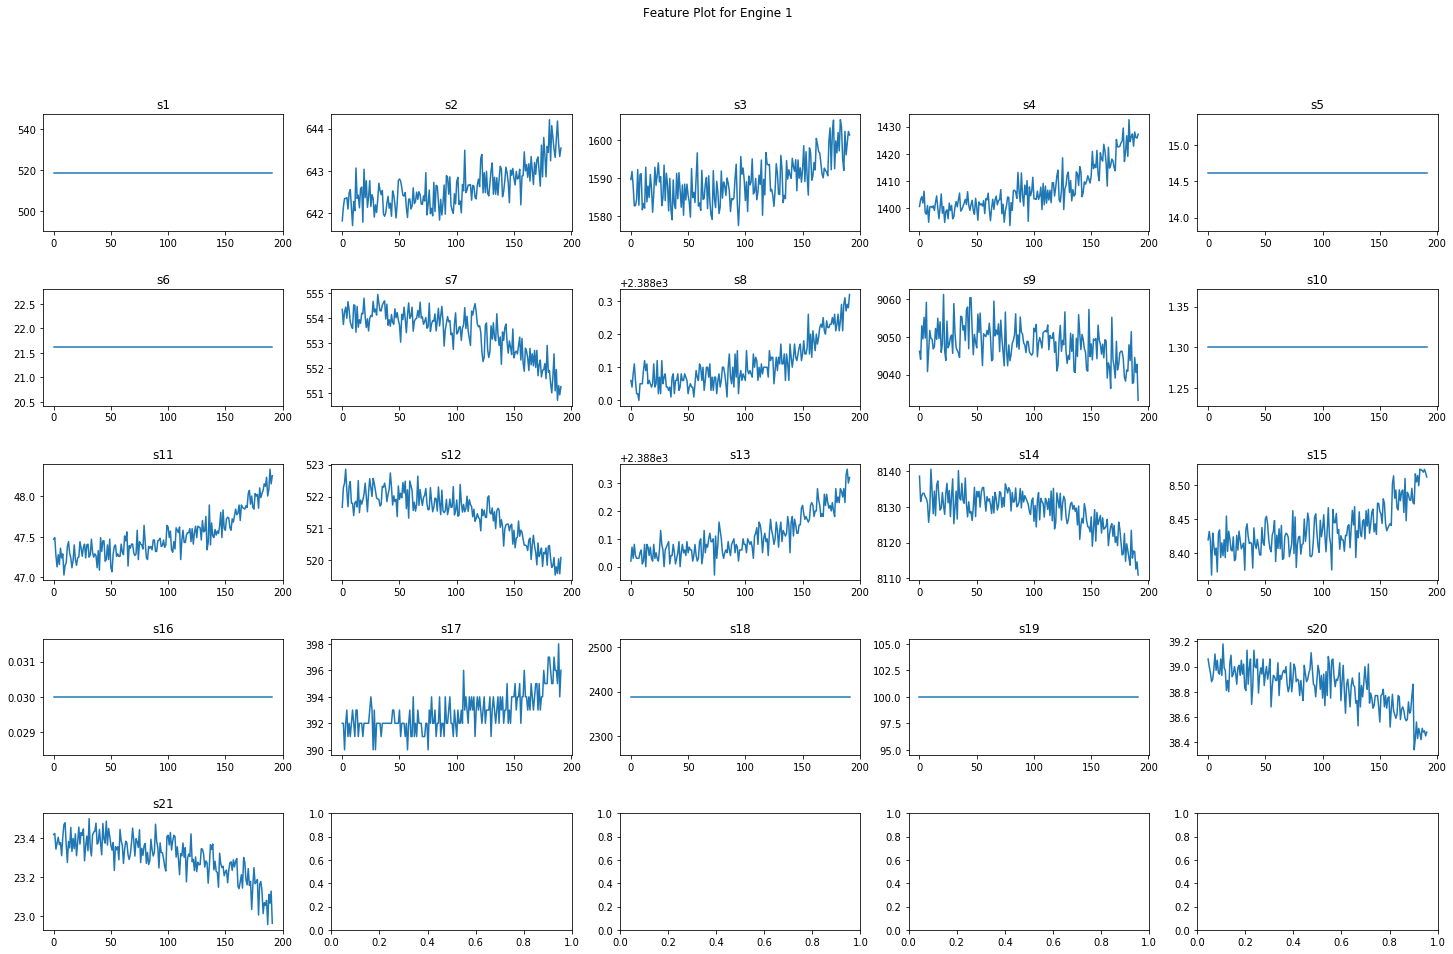

In [20]:
sensor_features = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20', 's21']

#Data Frame for Engine 1
df_e1 = df_train[df_train['id']==1]

#Let's plot the sensors for this enigne
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Feature Plot for Engine 1")

for ax, feat_name in zip(axes.flatten(), sensor_features):
  ax.plot(df_e1[feat_name])
  ax.set_title(feat_name)

So this tell's me that sensors s1, s5, s6, s10, s16, s18, s19 are almost constants across the various cycles for the turbine engine #1. As such these senors may not have a major role in the learning model which we will create

Let's verify the range of these senors for all the training data we have and check if the constant value is only for engine 1 or is this the case for all the engines.

In [21]:
cons_sensors = ['s1', 's5' , 's6', 's10', 's16', 's18', 's19']
display(df_train[cons_sensors].describe().T)

,count,mean,std,min,25%,50%,75%,max
s1,20631.0,518.670000,6.537152e-11,518.67,518.67,518.67,518.67,518.67
s5,20631.0,14.620000,3.394700e-12,14.62,14.62,14.62,14.62,14.62
s6,20631.0,21.609803,1.388985e-03,21.60,21.61,21.61,21.61,21.61
s10,20631.0,1.300000,4.660829e-13,1.30,1.30,1.30,1.30,1.30
s16,20631.0,0.030000,1.556432e-14,0.03,0.03,0.03,0.03,0.03
s18,20631.0,2388.000000,0.000000e+00,2388.00,2388.00,2388.00,2388.00,2388.00
s19,20631.0,100.000000,0.000000e+00,100.00,100.00,100.00,100.00,100.00


As we can see the minimum and maximum value for these sensors is constant. We will thus ignore these sensor readings from our analysis

Droping these columns from the original training and test dataframe, and updating the feature selection list

In [22]:
df_train.drop(cons_sensors, inplace=True, axis=1)
df_train.head(3)

,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442


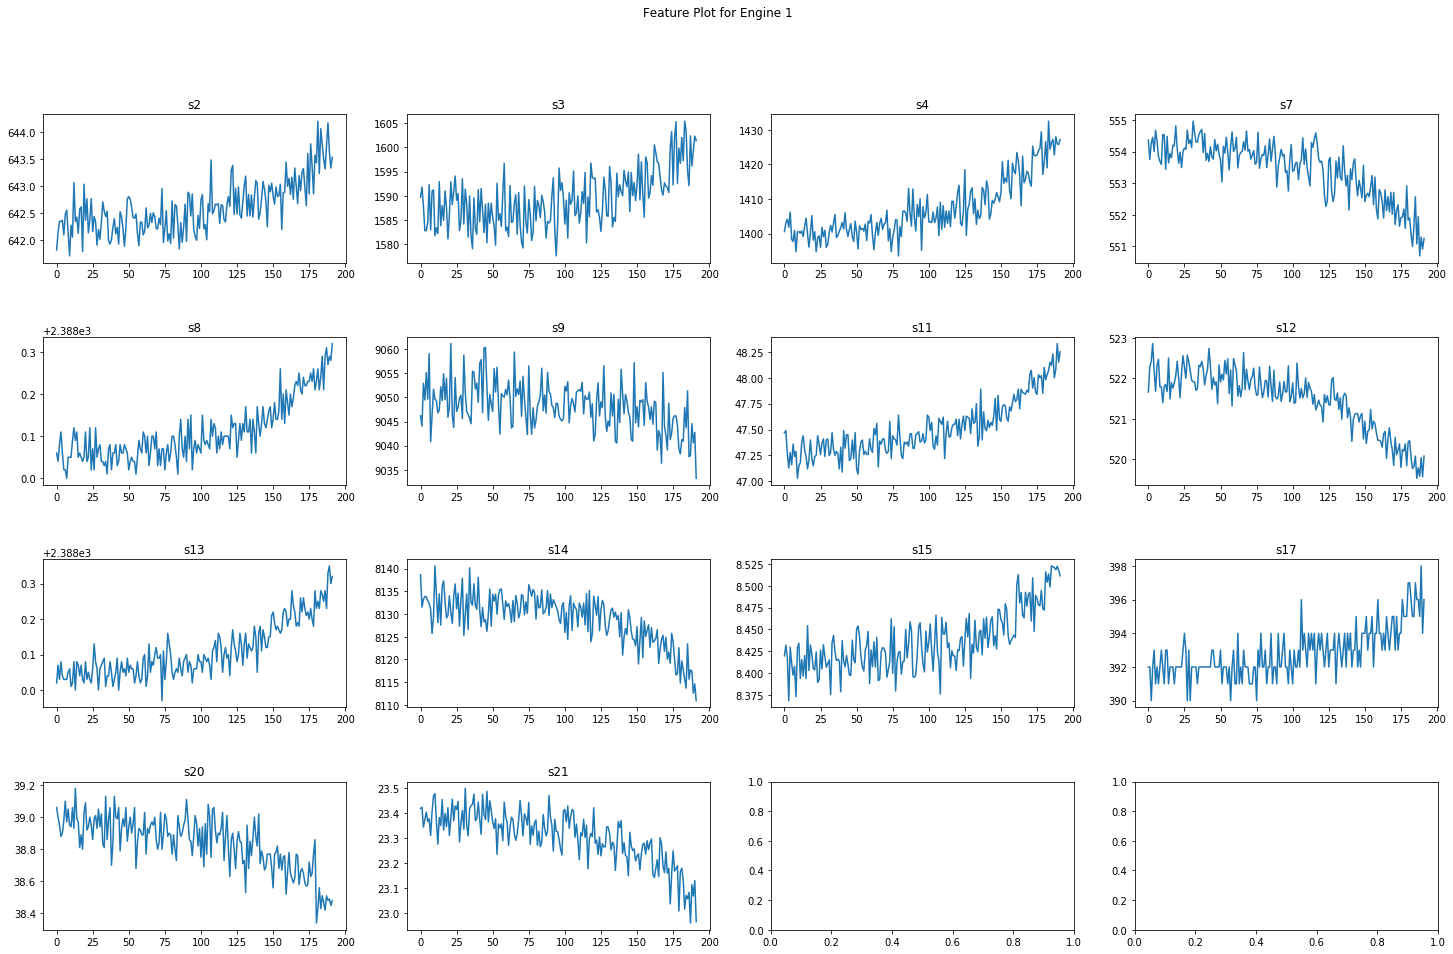

In [24]:
#Let's have a quick look at the engine 1 data with the updated sensor list
sensor_features = ['s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20', 's21']

#Data Frame for Engine 1
df_e1 = df_train[df_train['id']==1]

#Let's plot the sensors for this enigne
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Feature Plot for Engine 1")

for ax, feat_name in zip(axes.flatten(), sensor_features):
  ax.plot(df_e1[feat_name])
  ax.set_title(feat_name)

In [25]:
# Let's drop the constant columns from the Test Dataset as well, as we anyways will not be using these features in our analysis and predictions
df_test.drop(cons_sensors, inplace=True, axis=1)
display(df_test.head(3))

,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,1,0.0023,0.0003,100.0,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.2,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.5,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.5,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166


We will now proceed with the Data Preprocessing and Feature Engineering. One thing to be noted is that there is a random noise in the sensor data introcued by the CMAPSS Simulator - so among other things we will also look to smoothen the sensor data series.

As a summary
- We have dropped the constant columns from the training and test dataset, and
- We know that smoothening of the time series data is required. 
- df_train and df_test are the updated DataFrames that we will use moving forward - the constant sensor data has been remove from these dataframe (and they contain the id, cycle and operation settings)
- cons_features -> is the list containing the sensor's which were removed
- sensor_features -> is the updated list of sensor's which will be used for analysis

## 3. Data Preprocessing and Feature Engineering

### 3.1 Smoothening the Sensor Data - Adding the Rolling Mean and Rolling Standard Deviation Features

In [0]:
### df_train, df_test, cons_features, sensor_features
df_train_e1 = df_train[df_train['id']==1]
df_rolling = df_train_e1.rolling(3).mean()

In [31]:
display(df_train_e1.head())
display(df_rolling.head())

,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,-0.001033,-0.000133,100.0,642.106667,1589.836667,1402.646667,554.123333,2388.060000,9047.733333,47.410000,522.12,2388.04,8134.446667,8.423033,391.333333,39.003333,23.395600
3,1.0,3.0,-0.000567,0.000000,100.0,642.283333,1587.533333,1403.070000,554.153333,2388.076667,9048.830000,47.296667,522.52,2388.06,8132.850000,8.405933,391.333333,38.943333,23.380567
4,1.0,4.0,-0.001833,0.000033,100.0,642.356667,1584.543333,1404.096667,554.236667,2388.083333,9052.523333,47.226667,522.49,2388.05,8133.620000,8.405133,391.666667,38.910000,23.374167


In [0]:
def add_features(df_in, features, win):
  """
  Add rolling average and rolling standard deviation for sensors reading using the fixed rolling window size
  
  Args:
    df_in (dataframe)         : The input dataframe to be processed (training or test)
    rolling_win_size (int)    : The size of the rolling window
    features (list)           : List of features for which the rolling features will be calculated
    
  Returns:
    dataframe : contains the input dataframe with additional rolling mean and rolling standard deviation for each feature
  
  """
  
  features_rolling_mean = [n+'_av' for n in features]
  features_rolling_std = [n+'_std' for n in features]
  
  df_out = pd.DataFrame()
  
  ws = win
  #calculating rollings statistics for each machine id
  for m_id in pd.unique(df_in['id']):
    #get a subset of sensors data for each engine
    df_engine = df_in[df_in['id']==m_id]
    df_sub = df_engine[features]
    
    #get rolling mean for the subset
    av = df_sub.rolling(ws, min_periods=1).mean()
    av.columns = features_rolling_mean
    
    #get rolling standard deviation for the subset
    std = df_sub.rolling(ws, min_periods=1).std().fillna(0)
    std.columns = features_rolling_std
    
    #combining the newly calculated features to the engine subset
    new_ftrs = pd.concat([df_engine, av, std], axis = 1)
    
    #adding the new_ftrs and the original engine data as rows to output dataframe
    df_out = pd.concat([df_out, new_ftrs])
  
  return df_out

In [45]:
#Add extracted features to the training data
df_train_fx_rolling = add_features(df_train, sensor_features, 3)
df_train_fx_rolling.head()

,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,s2_av,s3_av,s4_av,s7_av,s8_av,s9_av,s11_av,s12_av,s13_av,s14_av,s15_av,s17_av,s20_av,s21_av,s2_std,s3_std,s4_std,s7_std,s8_std,s9_std,s11_std,s12_std,s13_std,s14_std,s15_std,s17_std,s20_std,s21_std
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,641.820000,1589.700000,1400.600000,554.360000,2388.060000,9046.190000,47.470000,521.66,2388.020,8138.620000,8.419500,392.000000,39.060000,23.419000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,641.985000,1590.760000,1401.870000,554.055000,2388.050000,9045.130000,47.480000,521.97,2388.045,8135.055000,8.425650,392.000000,39.030000,23.421300,0.233345,1.499066,1.796051,0.431335,0.014142,1.499066,0.014142,0.438406,0.035355,5.041671,0.008697,0.000000,0.042426,0.003253
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,642.106667,1589.836667,1402.646667,554.123333,2388.060000,9047.733333,47.410000,522.12,2388.040,8134.446667,8.423033,391.333333,39.003333,23.395600,0.267644,1.918654,1.850009,0.327159,0.020000,4.632023,0.121655,0.404475,0.026458,3.717450,0.007640,1.154701,0.055076,0.044573
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,642.283333,1587.533333,1403.070000,554.153333,2388.076667,9048.830000,47.296667,522.52,2388.060,8132.850000,8.405933,391.333333,38.943333,23.380567,0.115470,4.532288,1.166576,0.361985,0.035119,4.470582,0.181475,0.302655,0.026458,1.215401,0.033419,1.154701,0.060277,0.040118
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,642.356667,1584.543333,1404.096667,554.236667,2388.083333,9052.523333,47.226667,522.49,2388.050,8133.620000,8.405133,391.666667,38.910000,23.374167,0.011547,2.985052,2.176840,0.225906,0.025166,2.857872,0.083865,0.340441,0.026458,0.338083,0.032507,1.527525,0.036056,0.030101


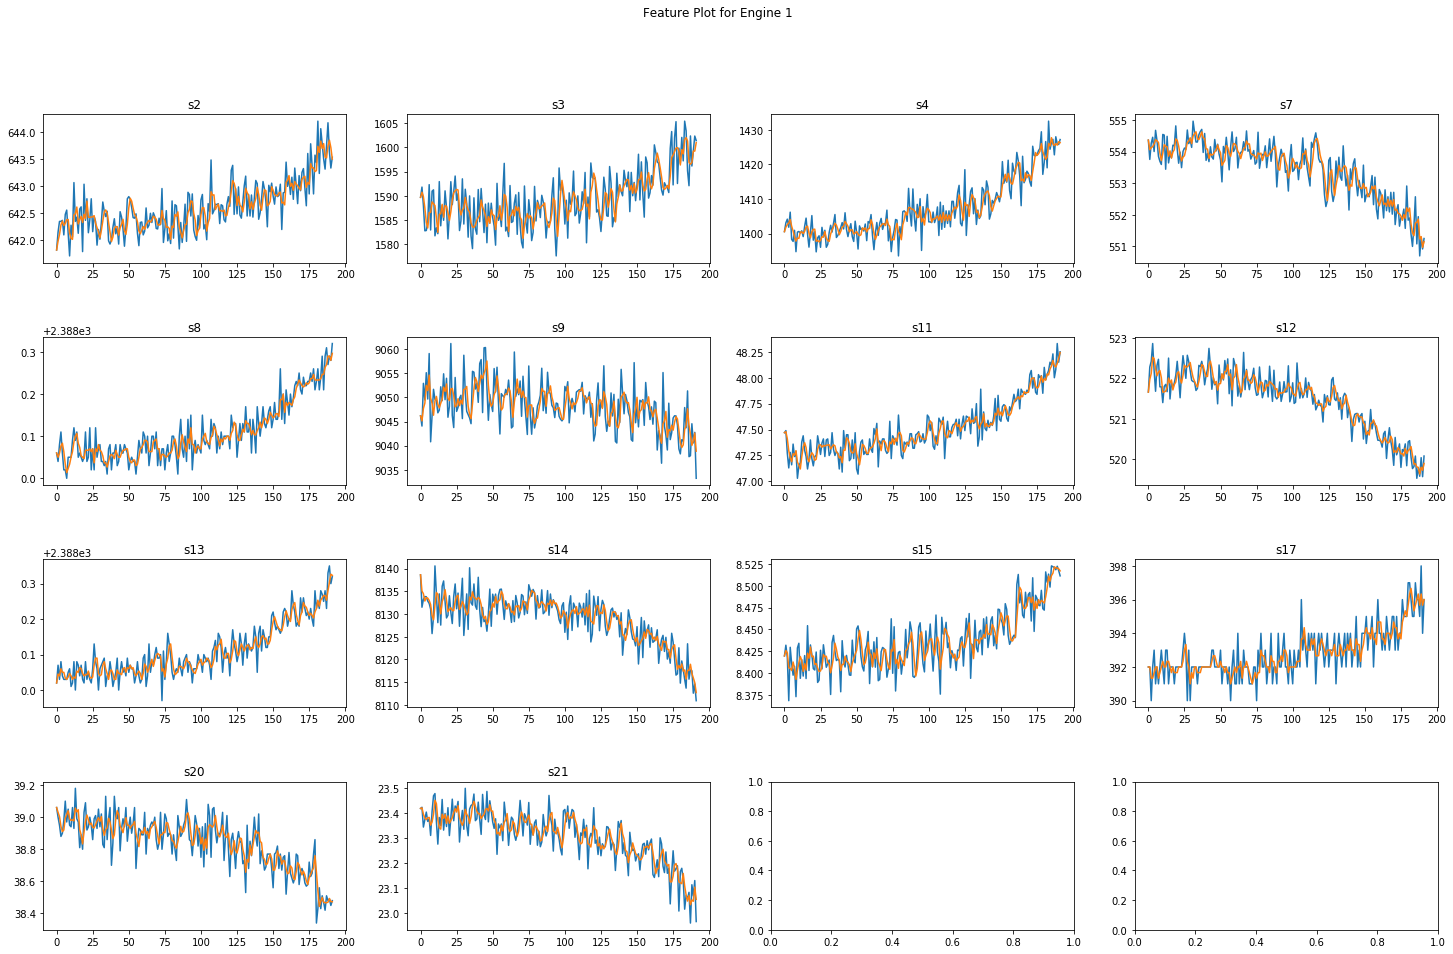

In [46]:
# Let's observe the smoothness in the data to ensure there is noting out of the ordinary.

#Let's have a quick look at the engine 1 data with the updated sensor list
sensor_features_avg = [n+'_av' for n in sensor_features]

#Data Frame for Engine 1
df_e1 = df_train_fx_rolling[df_train_fx_rolling['id']==1]

#Let's plot the sensors for this enigne
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Feature Plot for Engine 1")

for ax, feat_name, feat_avg_name in zip(axes.flatten(), sensor_features, sensor_features_avg):
  ax.plot(df_e1[feat_name])
  ax.plot(df_e1[feat_avg_name])
  ax.set_title(feat_name)

As we can see the noise (spikes in the data) has smoothened.  We have also calculated additional rolling standard deviation feature for each sensor data

### 3.2 Add Regression and Classification Labels to Training data

In [0]:
## HELPER FUNCTION TO ADD Regression and Classification Labels to the training data
def prepare_train_data(df_in, period):
  """
    Regression label: ttf (time-to-failure) = each cycle# for an engine subtracted from the last cycle# of the same engine
    Binary Classification Label: label_bnc = if ttf is <= the parameter period then 1, else 0 (values = 0 and 1)
    Multi-class Classification Label : label_mcc = 2 if ttf <=0.5 * parameter period, 1 if ttf < = parameter period, else 0
  """
  #Create Regression Label
  df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
  df_max_cycle.reset_index(level=0, inplace=True)
  df_max_cycle.columns=['id', 'last_cycle']
  
  #add TTT / RUL (time-to-failure, remaining useful life) as new column - the Regression Label
  df_in=pd.merge(df_in, df_max_cycle, on='id')
  df_in['rul']=df_in['last_cycle']-df_in['cycle']
  df_in.drop('last_cycle', inplace=True, axis=1)
  
  #Create Binary Classification Label
  df_in['label_bnc'] = df_in['rul'].apply(lambda x: 1 if x<=period else 0)
  
  #Create Multi Class Classification Label
  df_in['label_mcc'] = df_in['rul'].apply(lambda x: 2 if x <= 0.5*period else 1 if x<=period else 0)
  
  return df_in
  

In [51]:
df_train = prepare_train_data(df_train_fx, 30)
display(df_train.head())

,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,s2_av,s3_av,s4_av,s7_av,s8_av,s9_av,s11_av,s12_av,s13_av,s14_av,s15_av,s17_av,s20_av,s21_av,s2_std,s3_std,s4_std,s7_std,s8_std,s9_std,s11_std,s12_std,s13_std,s14_std,s15_std,s17_std,s20_std,s21_std,rul,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,641.820000,1589.700000,1400.600000,554.360000,2388.060000,9046.190000,47.470000,521.66,2388.020,8138.620000,8.419500,392.000000,39.060000,23.419000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,641.985000,1590.760000,1401.870000,554.055000,2388.050000,9045.130000,47.480000,521.97,2388.045,8135.055000,8.425650,392.000000,39.030000,23.421300,0.233345,1.499066,1.796051,0.431335,0.014142,1.499066,0.014142,0.438406,0.035355,5.041671,0.008697,0.000000,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,642.106667,1589.836667,1402.646667,554.123333,2388.060000,9047.733333,47.410000,522.12,2388.040,8134.446667,8.423033,391.333333,39.003333,23.395600,0.267644,1.918654,1.850009,0.327159,0.020000,4.632023,0.121655,0.404475,0.026458,3.717450,0.007640,1.154701,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,642.283333,1587.533333,1403.070000,554.153333,2388.076667,9048.830000,47.296667,522.52,2388.060,8132.850000,8.405933,391.333333,38.943333,23.380567,0.115470,4.532288,1.166576,0.361985,0.035119,4.470582,0.181475,0.302655,0.026458,1.215401,0.033419,1.154701,0.060277,0.040118,188,0,0
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,642.356667,1584.543333,1404.096667,554.236667,2388.083333,9052.523333,47.226667,522.49,2388.050,8133.620000,8.405133,391.666667,38.910000,23.374167,0.011547,2.985052,2.176840,0.225906,0.025166,2.857872,0.083865,0.340441,0.026458,0.338083,0.032507,1.527525,0.036056,0.030101,187,0,0


### 3.3 Prepare the Test Data
Prepare the Test Data

In [0]:
## HELPER FUNCTION TO ADD Regression and Classification Labels to the Test Data
def prepare_test_data(df_test_in, df_truth_in, period):
  """
    Regression label: ttf (time-to-failure) = extract the last cycle for each enginge and then merge the record with the truth data. All the other records / rows for an engine will be deleted.
    Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
    Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 0
  """
  
  df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())
  df_tst_last_cycle.reset_index(level=0, inplace=True)
  df_tst_last_cycle.columns = ['id', 'last_cycle']
  
  df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')
  
  
  df_test_in = df_test_in[df_test_in['cycle']==df_test_in['last_cycle']]
  df_test_in.drop(['last_cycle'], axis=1, inplace=True)
  
  df_test_in.reset_index(drop=True, inplace=True)
  
  df_test_in = pd.concat([df_test_in, df_truth_in], axis = 1)
  
  #create binary classification label
  df_test_in['label_bnc'] = df_test_in['rul'].apply(lambda x: 1 if x <= period else 0)
    
  #create multi-class classification label
  df_test_in['label_mcc'] = df_test_in['rul'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)
  
  return df_test_in

In [67]:
df_test_fx=add_features(df_test, sensor_features, 3)
df_test = prepare_test_data(df_test_fx, df_rul, 30)

display(df_test.head())

,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,s2_av,s3_av,s4_av,s7_av,s8_av,s9_av,s11_av,s12_av,s13_av,s14_av,s15_av,s17_av,s20_av,s21_av,s2_std,s3_std,s4_std,s7_std,s8_std,s9_std,s11_std,s12_std,s13_std,s14_std,s15_std,s17_std,s20_std,s21_std,rul,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,642.58,1581.22,1398.91,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552,642.440000,1584.696667,1399.330000,554.223333,2388.083333,9049.986667,47.350000,521.986667,2388.076667,8132.676667,8.411533,392.000000,38.973333,23.374733,0.437150,3.094614,1.475534,0.172143,0.005774,5.594375,0.104403,0.349333,0.020817,2.372706,0.009411,1.000000,0.145717,0.028070,112,0,0
1,2,49,0.0018,-0.0001,100.0,642.55,1586.59,1410.83,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618,642.680000,1587.293333,1408.673333,553.686667,2388.113333,9047.940000,47.536667,521.763333,2388.103333,8127.106667,8.439700,391.666667,38.893333,23.283367,0.153948,0.612563,4.747803,0.491664,0.061101,3.917742,0.119304,0.455448,0.011547,1.570234,0.015373,0.577350,0.090738,0.018825,98,0,0
2,3,126,-0.0016,0.0004,100.0,642.88,1589.75,1418.89,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740,643.060000,1589.626667,1414.756667,552.663333,2388.160000,9048.406667,47.703333,520.610000,2388.170000,8131.030000,8.442600,394.666667,38.723333,23.245433,0.180000,0.931146,3.580703,0.405010,0.030000,0.752152,0.153080,0.416173,0.036056,2.819699,0.026739,0.577350,0.188768,0.025085,69,0,0
3,4,106,0.0012,0.0004,100.0,642.78,1594.53,1406.88,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581,642.770000,1592.153333,1407.083333,553.406667,2388.153333,9055.720000,47.673333,521.353333,2388.123333,8134.256667,8.459267,394.000000,38.706667,23.261000,0.085440,2.901454,1.040016,0.713045,0.025166,5.073579,0.020817,0.480139,0.015275,0.822091,0.008220,1.732051,0.148436,0.010359,82,0,0
4,5,98,-0.0013,-0.0004,100.0,642.27,1589.94,1419.36,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117,642.566667,1591.820000,1414.560000,553.283333,2388.106667,9054.810000,47.536667,521.143333,2388.123333,8128.680000,8.435467,393.666667,38.760000,23.313167,0.256970,1.659277,5.144016,0.400042,0.011547,1.292556,0.187172,0.265769,0.025166,2.635356,0.013415,0.577350,0.085440,0.093289,91,0,0


# 10. Trials

In [30]:
import pandas as pd
col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21', 's22', 's23' ]

train_FD001 = pd.read_csv("prognostic/train_FD001.txt", sep=" ", header=None, names=col_names)
train_FD001.drop(['s22', 's23'], inplace=True, axis=1)
train_FD001.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [31]:
test_FD001 = pd.read_csv("prognostic/test_FD001.txt", sep=" ", header=None, names=col_names)
test_FD001.drop(['s22', 's23'], inplace=True, axis=1)
test_FD001.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [32]:
RUL_FD001 = pd.read_csv("prognostic/RUL_FD001.txt", sep=" ", header=None)
RUL_FD001.drop([1], inplace=True, axis=1)
RUL_FD001.columns = ['RUL']
RUL_FD001.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [33]:
#Lets have a look at the unique value of Turbine IDs in train, test and rul
train_FD001.id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [34]:
test_FD001.id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [35]:
RUL_FD001.RUL.count()

100

In [0]:
# So this means that there is data for 100 unique turbines in train and test and the corresponding RUL information for the 100 turbines is provided in the RUL file.

## 2. Lets to the Unsupervised Classification on the Dataset##

In [0]:
columns = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21', 's22', 's23' ]
df_train = pd.read_csv("prognostic/train_FD001.txt", sep=" ", header=None, names=col_names)
df_train.drop(['s22', 's23'], inplace=True, axis=1)

df_test = pd.read_csv("prognostic/test_FD001.txt", sep=" ", header=None, names=col_names)
df_test.drop(['s22', 's23'], inplace=True, axis=1)

df_RUL = pd.read_csv("prognostic/RUL_FD001.txt", sep=" ", header=None)
df_RUL.drop([1], inplace=True, axis=1)
df_RUL.columns = ['RUL']

In [38]:
from IPython.display import display # Allows the use of display() for DataFrames
display(df_train.head(3))
display(df_test.head(3))
display(df_RUL.head(3))


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166


,RUL
0,112
1,98
2,69


In [39]:
display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


### Explore the feature sets and preprocess for PCA ###
- Look for Null Values, Variance and Standard Deviations
- Normalize the data

In [0]:
#excluding engine ID and cycle number from the input features
features = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']


In [41]:
display(df_train[features].describe().T)

,count,mean,std,min,25%,50%,75%,max
s1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200
s6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s10,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.3000,1.3000,1.3000


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

from pandas.plotting import scatter_matrix  

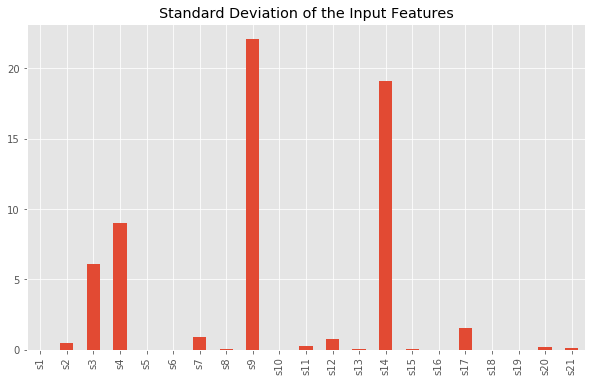

In [43]:
#Plot and compare the standard deviations of the all the input features
df_train[features].std().plot(kind='bar', figsize=(10,6), title="Standard Deviation of the Input Features")

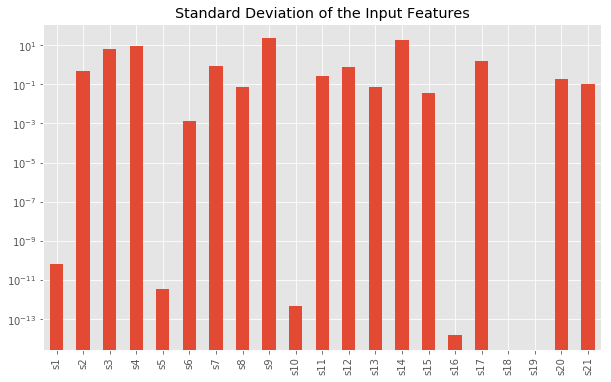

In [44]:
df_train[features].std().plot(kind='bar', figsize=(10,6), logy=True, title="Standard Deviation of the Input Features")

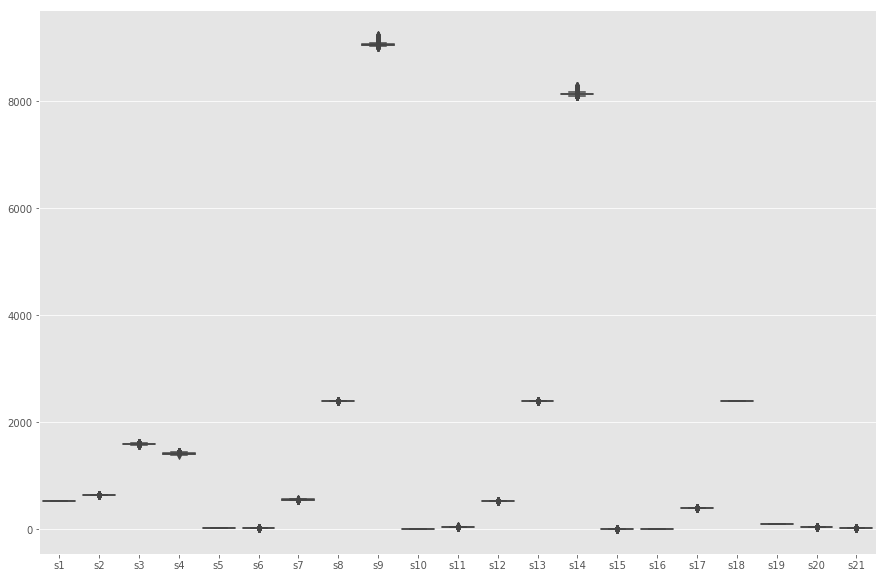

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
feature_data = df_train[features]
sns.boxplot(data=feature_data)
plt.show()

We can see that the range of the values (min and max) of the individual features and possible the variations that each feature exhibit are quite different. Given these are sensor readings and based on the understanding of the data the sensors are measuring different attributes with different unit of measurements

So for PCA purposes we will have to perform the feature scaling.  Lets see if most of the features are normally distributed or not and we may choose to do the "Standardization" scaling to the features before applying the PCA i.e. set mean as 0 and standard deviation as 1


In [0]:
def explore_feature(f, df):
  fig = plt.figure(figsize=(10,4))
  
  sub1 = fig.add_subplot(121)
  sub1.set_title(f+ ' Histogram')
  sub1.hist(df[f])
  
  sub2 = fig.add_subplot(122)
  sub2.set_title(f+ ' Boxplot')
  sub2.boxplot(df[f])
  
  plt.tight_layout()
  plt.show()

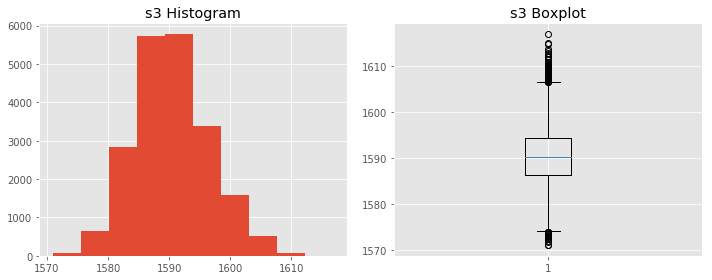

In [47]:
explore_feature("s3", df_train)

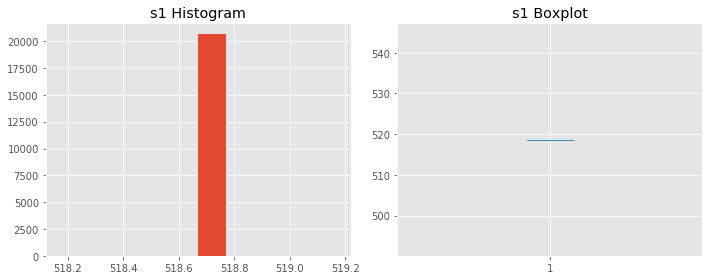

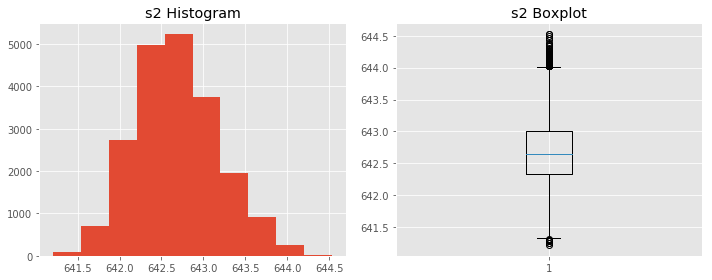

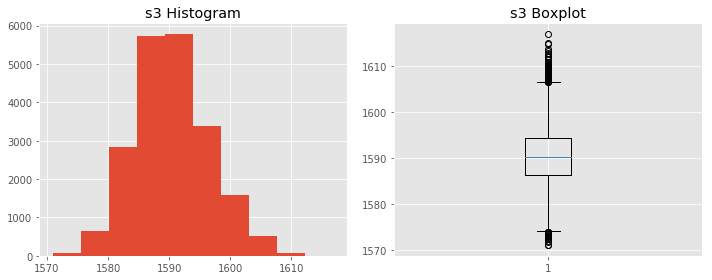

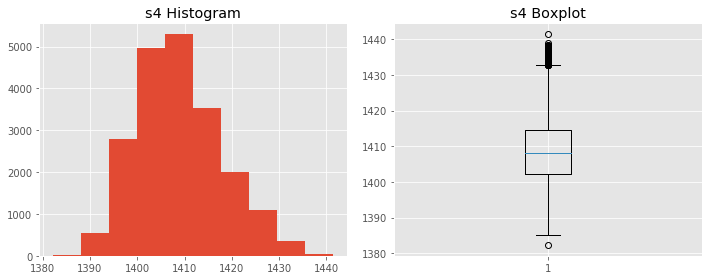

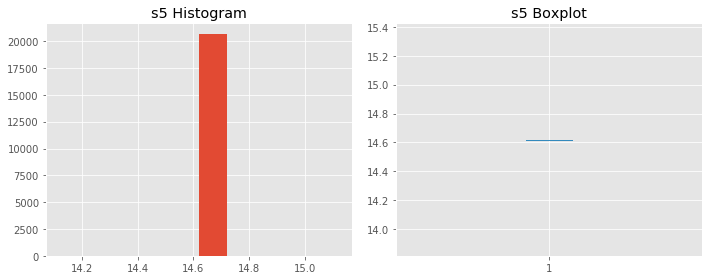

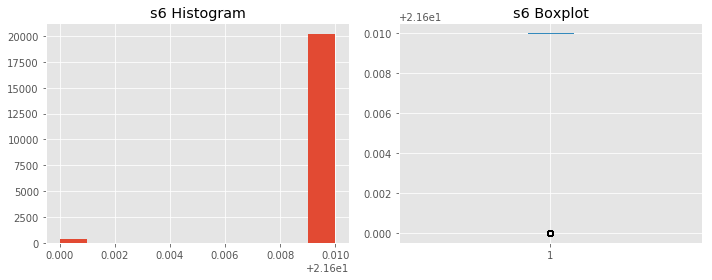

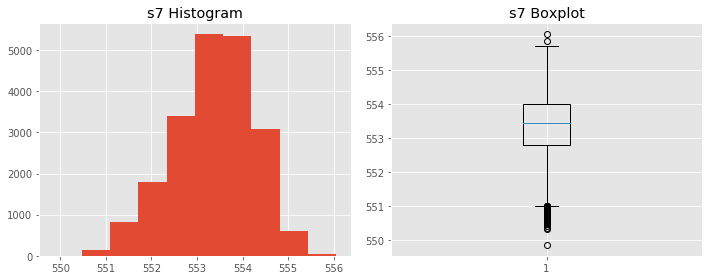

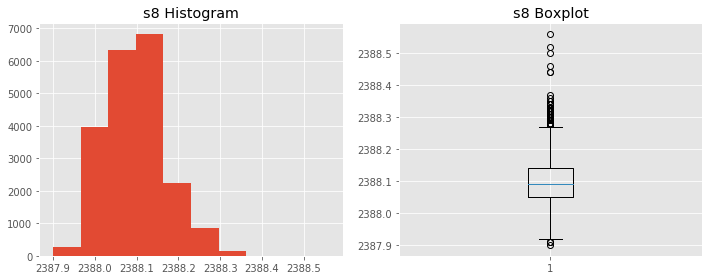

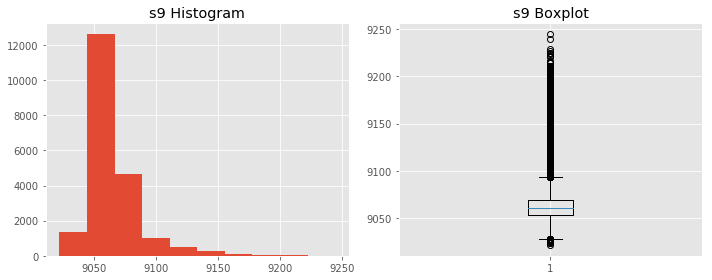

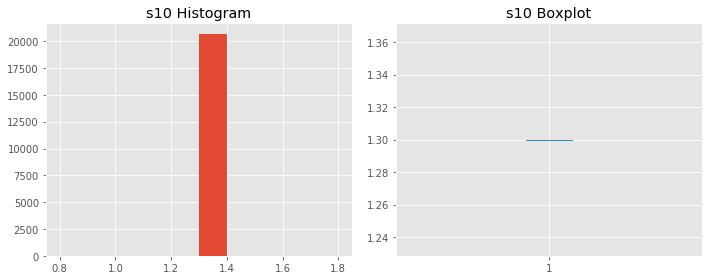

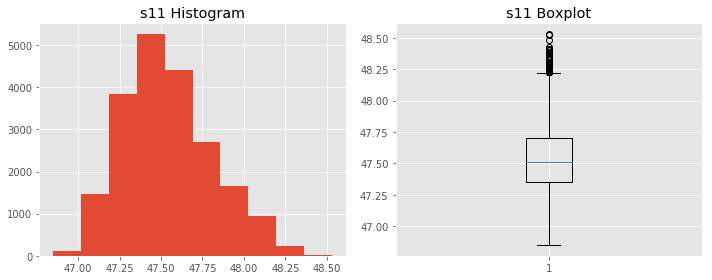

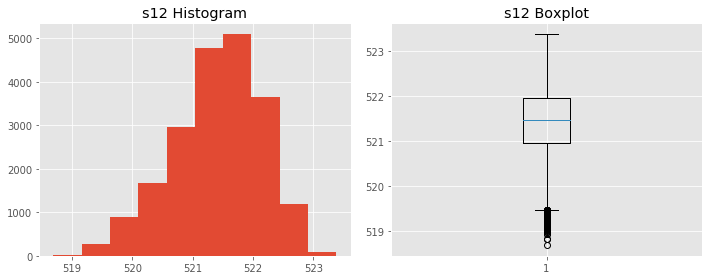

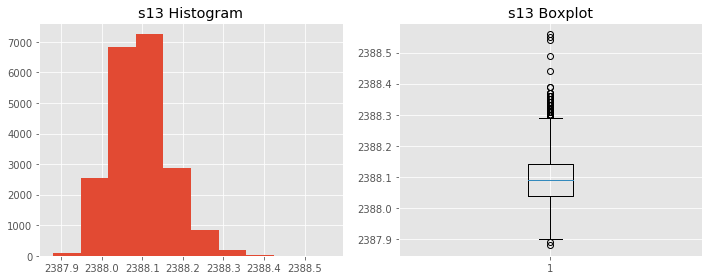

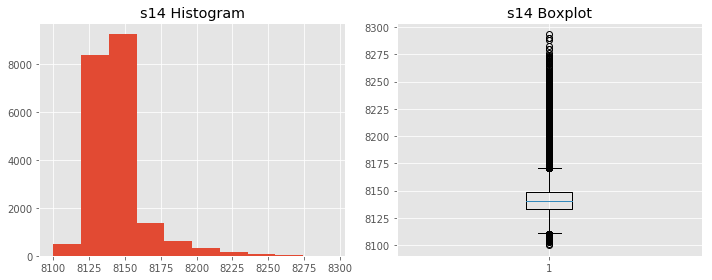

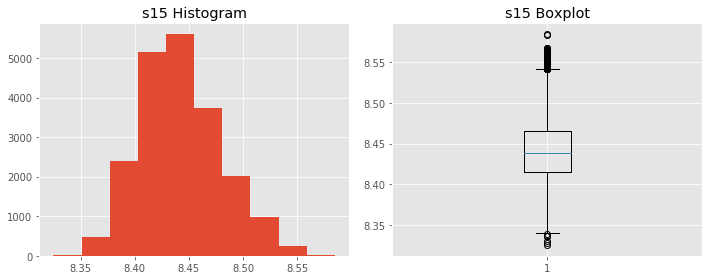

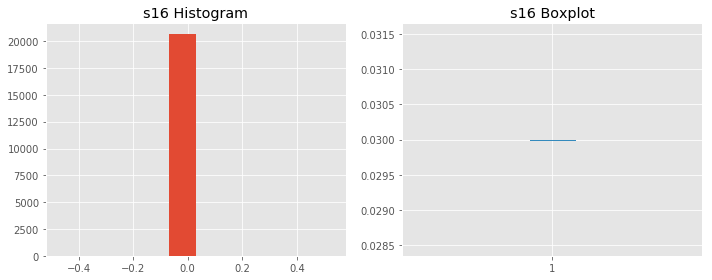

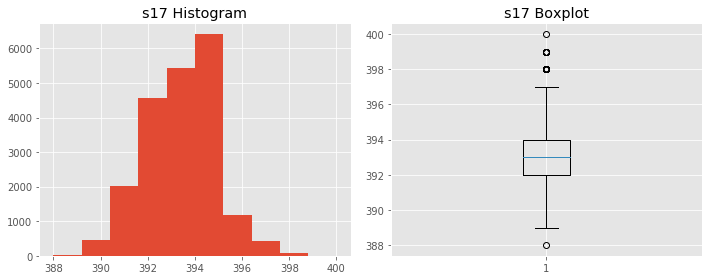

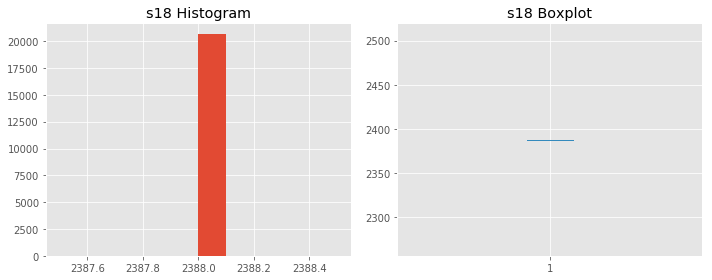

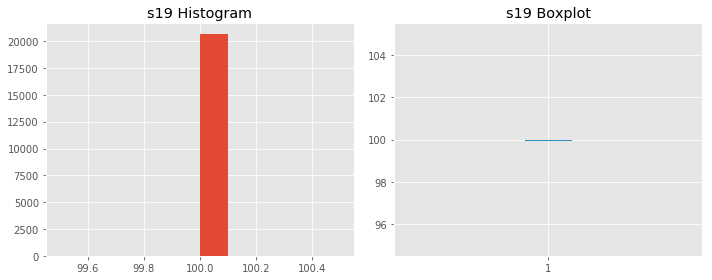

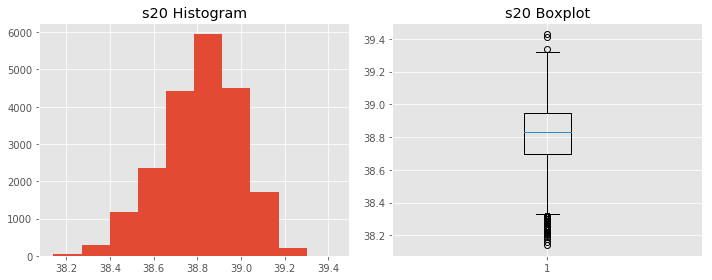

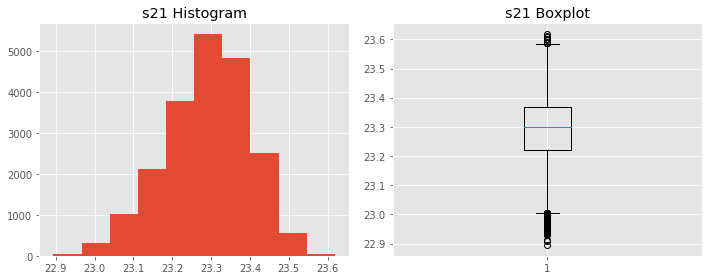

In [48]:
for feature in features:
  explore_feature(feature, df_train)

In [0]:
#removing s1, s5, s6, s10, s16, s18 and s19 from the features to be considered
ftr_list_include =  ['s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20','s21'];
ftr_list_drop = ['s1', 's5', 's6', 's10', 's16', 's18', 's19']

identifier_list = ['id', 'cycle', 'setting1', 'setting2', 'setting3' ]

df_selfeature_train = df_train[ftr_list]



In [68]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

#removing s1, s5, s6, s10, s16, s18 and s19 from the features to be considered
ftr_list =  ['s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20','s21']

df_train_selFeatures = df_train.drop()

#scaling the features data
df_train_sclftr = pd.DataFrame(preprocessing.scale(df_train[ftr_list]), columns=ftr_list)

display(df_train_sclftr.describe().T)


,count,mean,std,min,25%,50%,75%,max
s2,20631.0,6.258537e-14,1.000024,-2.941625,-0.711809,-0.081860,0.638080,3.697829
s3,20631.0,-4.962530e-14,1.000024,-3.177804,-0.695338,-0.069013,0.629079,4.303846
s4,20631.0,8.308134e-16,1.000024,-2.964737,-0.730389,-0.099305,0.624553,3.617202
s7,20631.0,-3.149990e-14,1.000024,-3.974497,-0.630132,0.081676,0.725692,3.041891
s8,20631.0,1.008424e-12,1.000024,-2.770375,-0.657216,-0.093707,0.610680,6.527526
s9,20631.0,-4.172343e-14,1.000024,-1.970486,-0.549894,-0.207539,0.189158,8.121740
s11,20631.0,-2.547136e-15,1.000024,-2.587860,-0.715769,-0.116699,0.594696,3.702368
s12,20631.0,-1.199984e-13,1.000024,-3.692663,-0.614845,0.090206,0.727463,2.666353
s13,20631.0,3.503748e-13,1.000024,-3.005574,-0.780793,-0.085548,0.609696,6.449748
s14,20631.0,2.704422e-15,1.000024,-2.296780,-0.550843,-0.168419,0.238905,7.861686


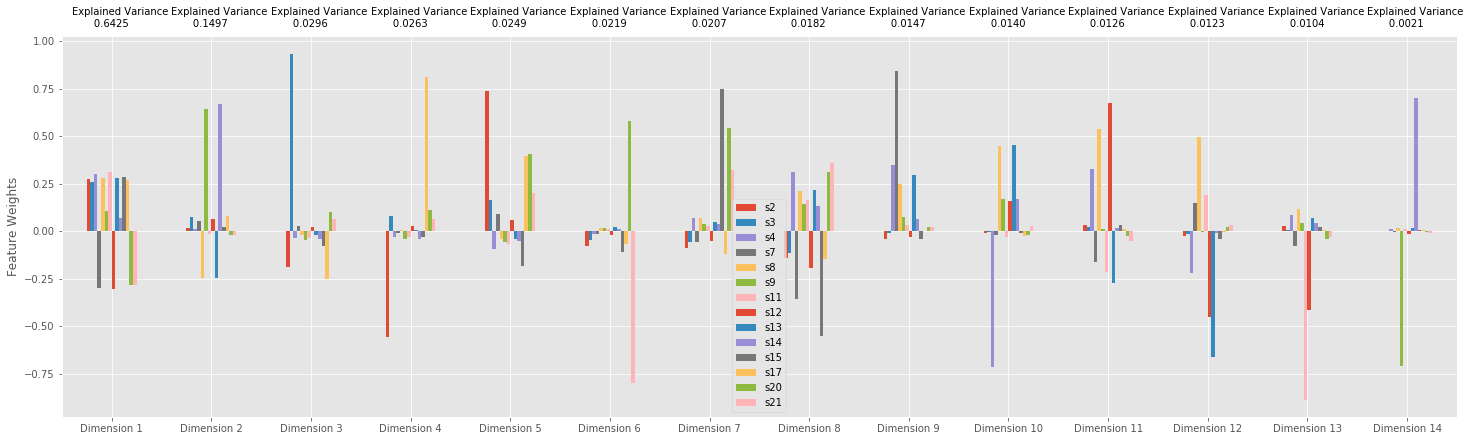

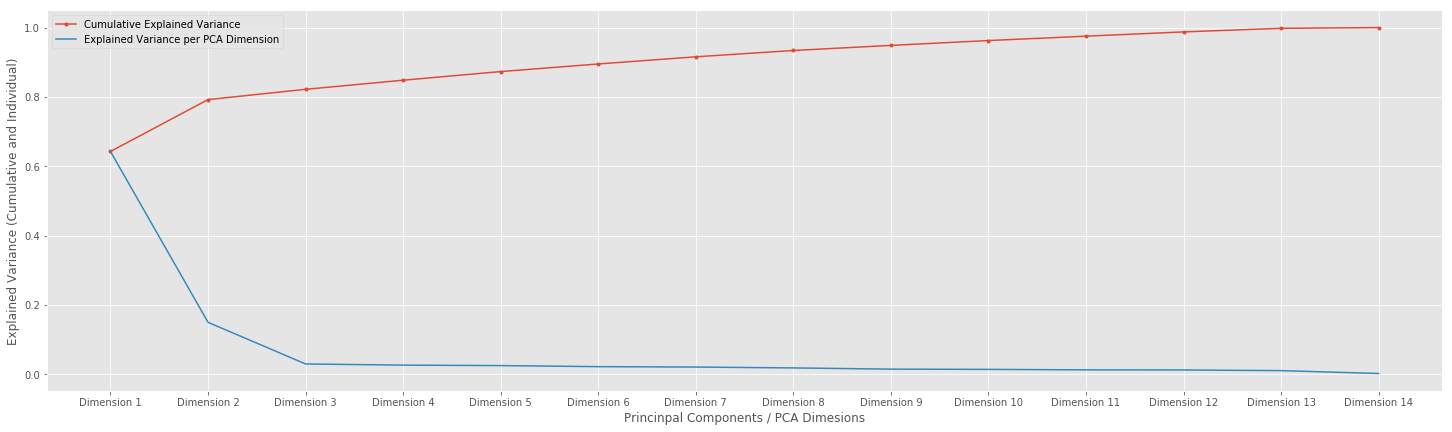

In [226]:
from sklearn.decomposition import PCA

def pca_results(good_data, pca, size):
  """
  Create a DataFrame of the PCA results.
  Includes Dimension Feature Weigts and explained variances and explained variance ratios
  Visualize the PCA results
  """
  
  #Label the dimensions of the PCA as Dimension 1, Dimension 2 and so on
  dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]
  
  #Create the dataframe of the PCA Components
  components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
  components.index = dimensions
  
  #PCA explained variance
  ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
  variance_ratios = pd.DataFrame(np.round(ratios,4), columns=['Explained Variance'])
  variance_ratios.index=dimensions
  
  #Create a bar plot visualization
  fig, ax = plt.subplots(figsize=size)
  
  #Plot the Feature Weights as the function of the components
  components.plot(ax=ax, kind='bar')
  ax.legend()
  ax.set_ylabel("Feature Weights")
  ax.set_xticklabels(dimensions, rotation=0)
  
  #Display the explained variance ratios
  for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.40, ax.get_ylim()[1]+0.05, "Explained Variance\n       %.4f"%(ev))
  

  
  
  #Create the Line Chart for cumulate explained variance an explained variance of individial princinple dimensions
  fig1, ax1 = plt.subplots(figsize=size)
  ax1.plot(np.cumsum(variance_ratios), label="Cumulative Explained Variance", marker=".")
  ax1.plot(variance_ratios, label="Explained Variance per PCA Dimension")
  ax1.set_xlabel("Princinpal Components / PCA Dimesions")
  ax1.set_ylabel("Explained Variance (Cumulative and Individual)")
  ax1.legend()
  
 
  plt.show()
  return(pd.concat([variance_ratios, components], axis=1))



# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(random_state=2).fit(df_train_sclftr)
pca_results = pca_results(df_train_sclftr, pca, (25,7))


In [0]:
def plot_PCA_2D(good_data, reduced_data, pca, size):
  """
  Produce a 2D Scatter plot that show's the reduced dataset for all the observations
  
  Arguments:
  good_data = original data before transformation, in a Pandas Dataframe with Columns Names
  reduced_data = reduced data set, first two dimensions are plotted.
  pca = pca objects that contain component attributes
  
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot

  """
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,8))
  ax[0].scatter(x=reduced_data.loc[:,'Dimension 1'], y=reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5)
  ax[0].set_xlabel("Dimension 1")
  ax[0].set_ylabel("Dimension 2")
  ax[0].set_title("Scatter Plot of the first two Principal Components / Dimensions")
  
  ax[1].scatter(x=reduced_data.loc[:,'Dimension 1'], y=reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5)
  ax[1].scatter(x=reduced_data.groupby('id').first()['Dimension 1'], y=reduced_data.groupby('id').first()['Dimension 2'], facecolors='red', edgecolors='red' )
  ax[1].scatter(x=reduced_data.groupby('id').last()['Dimension 1'], y=reduced_data.groupby('id').last()['Dimension 2'], facecolors='yellow', edgecolors='yellow' )
  
  
  return ax
  

In [0]:
pca = PCA(random_state=2).fit(df_train_sclftr)

#Label the dimensions of the PCA as Dimension 1, Dimension 2 and so on
dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]

#Transform the training data features using the fitted PCa
reduced_data_features=pd.DataFrame(pca.transform(df_train_sclftr), columns=dimensions)

#Adding identifier from the original training dataset to the reduced dataframes, and training dataset with selected features 
df_identifier = df_train[identifier_list]

df_train_scaled = pd.concat([df_identifier, df_train_sclftr], axis=1)
df_reduced_data = pd.concat([df_identifier, reduced_data_features], axis=1)

#plot_PCA_2D(df_train_scaled, df_reduced_data, pca, (12,8))

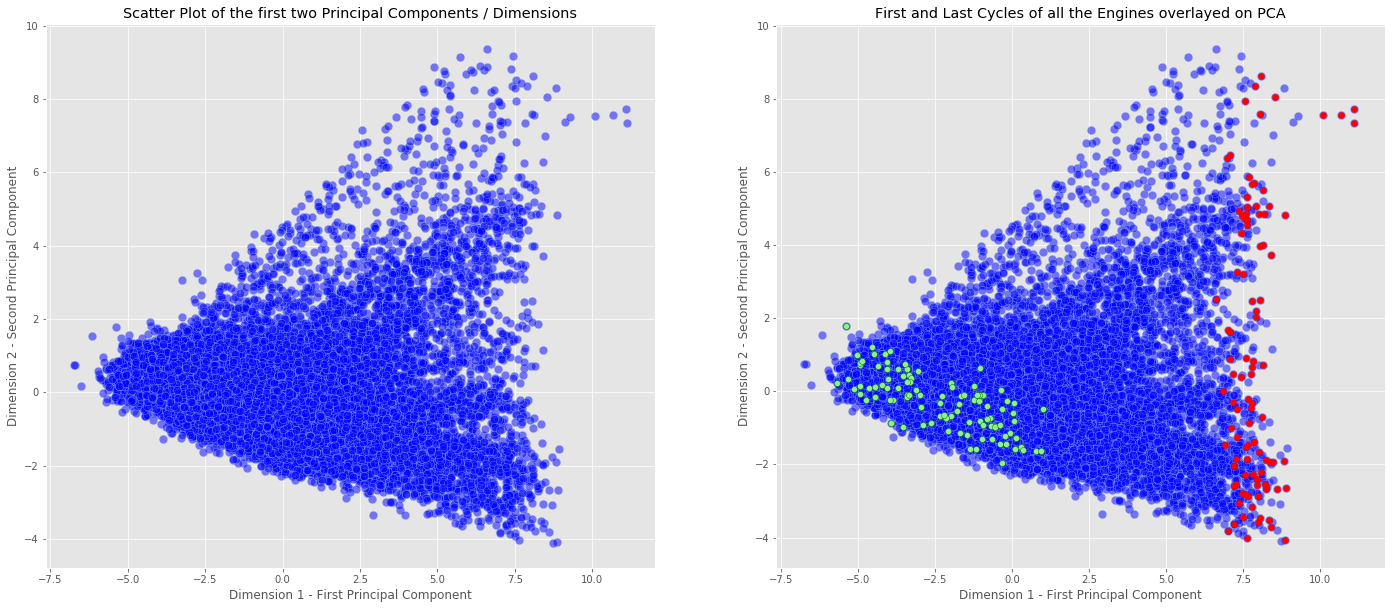

In [219]:
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))
  ax[0].scatter(x=df_reduced_data.loc[:,'Dimension 1'], y=df_reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5)
  ax[0].set_xlabel("Dimension 1 - First Principal Component")
  ax[0].set_ylabel("Dimension 2 - Second Principal Component")
  ax[0].set_title("Scatter Plot of the first two Principal Components / Dimensions")
  
  ax[1].set_xlabel("Dimension 1 - First Principal Component")
  ax[1].set_ylabel("Dimension 2 - Second Principal Component")
  ax[1].set_title("First and Last Cycles of all the Engines overlayed on PCA")
  ax[1].scatter(x=df_reduced_data.loc[:,'Dimension 1'], y=df_reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5)
  ax[1].scatter(x=df_reduced_data.groupby('id').first()['Dimension 1'], y=df_reduced_data.groupby('id').first()['Dimension 2'], facecolors='lightgreen', edgecolors='green' )
  ax[1].scatter(x=df_reduced_data.groupby('id').last()['Dimension 1'], y=df_reduced_data.groupby('id').last()['Dimension 2'], facecolors='red', edgecolors='red' )

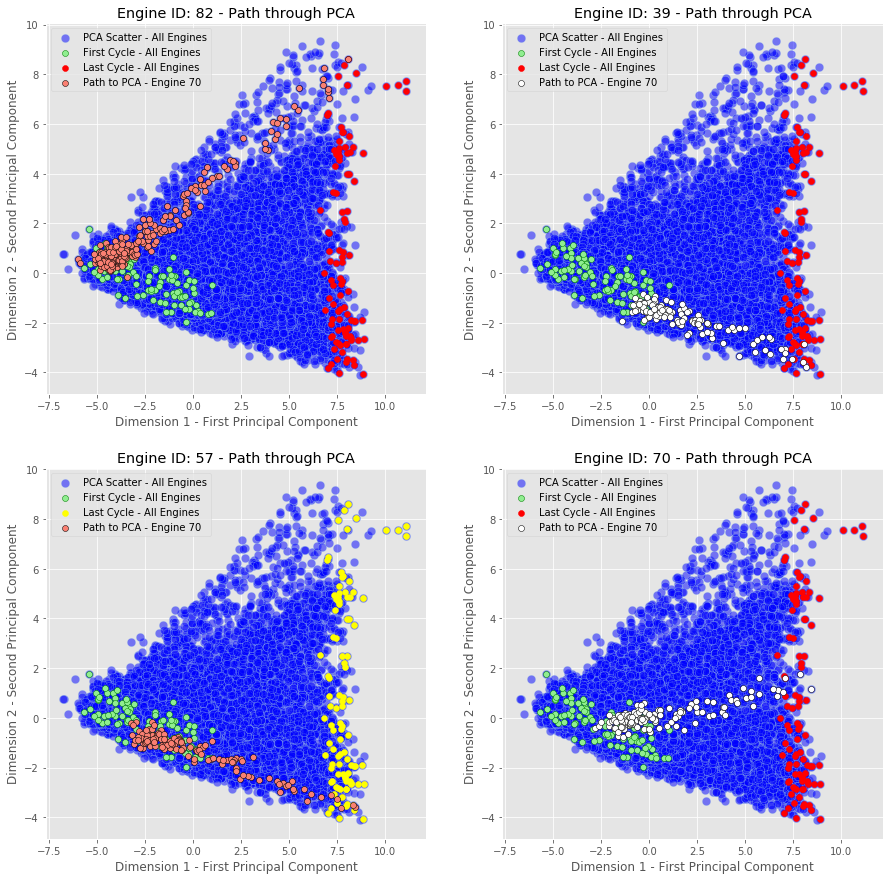

In [228]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

ax[0,0].scatter(x=df_reduced_data.loc[:,'Dimension 1'], y=df_reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5, label="PCA Scatter - All Engines")
ax[0,0].scatter(x=df_reduced_data.groupby('id').first()['Dimension 1'], y=df_reduced_data.groupby('id').first()['Dimension 2'], facecolors='lightgreen', edgecolors='green', label="First Cycle - All Engines")
ax[0,0].scatter(x=df_reduced_data.groupby('id').last()['Dimension 1'], y=df_reduced_data.groupby('id').last()['Dimension 2'], facecolors='red', edgecolors='red', label="Last Cycle - All Engines" )
ax[0,0].scatter(x=df_reduced_data[df_reduced_data['id']==82]['Dimension 1'], y=df_reduced_data[df_reduced_data['id']==82]['Dimension 2'], facecolors='salmon', edgecolor='black', label='Path to PCA - Engine 70')
ax[0,0].set_xlabel("Dimension 1 - First Principal Component")
ax[0,0].set_ylabel("Dimension 2 - Second Principal Component")
ax[0,0].set_title("Engine ID: 82 - Path through PCA")
ax[0,0].legend()

ax[0,1].scatter(x=df_reduced_data.loc[:,'Dimension 1'], y=df_reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5, label="PCA Scatter - All Engines")
ax[0,1].scatter(x=df_reduced_data.groupby('id').first()['Dimension 1'], y=df_reduced_data.groupby('id').first()['Dimension 2'], facecolors='lightgreen', edgecolors='green', label="First Cycle - All Engines")
ax[0,1].scatter(x=df_reduced_data.groupby('id').last()['Dimension 1'], y=df_reduced_data.groupby('id').last()['Dimension 2'], facecolors='red', edgecolors='red', label="Last Cycle - All Engines" )
ax[0,1].scatter(x=df_reduced_data[df_reduced_data['id']==39]['Dimension 1'], y=df_reduced_data[df_reduced_data['id']==39]['Dimension 2'], facecolors='white', edgecolor='black', label='Path to PCA - Engine 70')
ax[0,1].set_xlabel("Dimension 1 - First Principal Component")
ax[0,1].set_ylabel("Dimension 2 - Second Principal Component")
ax[0,1].set_title("Engine ID: 39 - Path through PCA")
ax[0,1].legend()

ax[1,0].scatter(x=df_reduced_data.loc[:,'Dimension 1'], y=df_reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5, label="PCA Scatter - All Engines")
ax[1,0].scatter(x=df_reduced_data.groupby('id').first()['Dimension 1'], y=df_reduced_data.groupby('id').first()['Dimension 2'], facecolors='lightgreen', edgecolors='green', label="First Cycle - All Engines")
ax[1,0].scatter(x=df_reduced_data.groupby('id').last()['Dimension 1'], y=df_reduced_data.groupby('id').last()['Dimension 2'], facecolors='yellow', edgecolors='yellow', label="Last Cycle - All Engines" )
ax[1,0].scatter(x=df_reduced_data[df_reduced_data['id']==57]['Dimension 1'], y=df_reduced_data[df_reduced_data['id']==57]['Dimension 2'], facecolors='salmon', edgecolor='black', label='Path to PCA - Engine 70')
ax[1,0].set_xlabel("Dimension 1 - First Principal Component")
ax[1,0].set_ylabel("Dimension 2 - Second Principal Component")
ax[1,0].set_title("Engine ID: 57 - Path through PCA")
ax[1,0].legend()

ax[1,1].scatter(x=df_reduced_data.loc[:,'Dimension 1'], y=df_reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5, label="PCA Scatter - All Engines")
ax[1,1].scatter(x=df_reduced_data.groupby('id').first()['Dimension 1'], y=df_reduced_data.groupby('id').first()['Dimension 2'], facecolors='lightgreen', edgecolors='green', label="First Cycle - All Engines")
ax[1,1].scatter(x=df_reduced_data.groupby('id').last()['Dimension 1'], y=df_reduced_data.groupby('id').last()['Dimension 2'], facecolors='red', edgecolors='red', label="Last Cycle - All Engines" )
ax[1,1].scatter(x=df_reduced_data[df_reduced_data['id']==70]['Dimension 1'], y=df_reduced_data[df_reduced_data['id']==70]['Dimension 2'], facecolors='white', edgecolor='black', label='Path to PCA - Engine 70')
ax[1,1].set_xlabel("Dimension 1 - First Principal Component")
ax[1,1].set_ylabel("Dimension 2 - Second Principal Component")
ax[1,1].set_title("Engine ID: 70 - Path through PCA")
ax[1,1].legend()

